In [520]:
from PIL import Image
import numpy as np

file_path = 'E:\SamplePhotos\P1240040.jpg' # defien file path
im = Image.open(file_path) # import pictuate as Pillow Image object
pix = np.array(im) # convert to Numpy aray
h, w, d = orig_shape = tuple(pix.shape) # store original shape of array
pix_flat = np.reshape(pix, (h*w, d)) # flatten image for clustering
print(file_path)

E:\SamplePhotos\P1240040.jpg


In [521]:
## initiate sklearnex
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.cluster import KMeans # import K means
import matplotlib.pyplot as plt

no_clusters = 5 # start clustering from 5 clusters
clusterMin = 1 # set cluster min at 1 to enter while loop
while clusterMin > 0.01: # continue to increase number of clusters until the smallest cluster becomes suficently small to just be stripes
    print(no_clusters)
    kmeans = KMeans(n_clusters = no_clusters) # define cluster object
    cluster = kmeans.fit(pix_flat) # find clusters
    labels = cluster.labels_ # save cluster labels as a list
    percent = np.unique(labels, return_counts=True) # get counts # pixels in each cluster
    stripeColour = np.where(percent[1] == min(percent[1])) # return label of least frequent pixel
    clusterMin = min(percent[1]) / (h*w) # find fraction of picture occupied by smallest cluster
    print(clusterMin)
    no_clusters += 1 # increase cluster counter by 1

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


5
0.07294816666666666
6
0.07171
7
0.006721


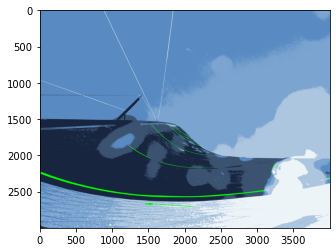

In [522]:
kmeans_image = cluster.cluster_centers_ # save cluster centres to plot image to check clusters
kmeans_image[stripeColour] = np.asarray([0,255,0]) # change the stripe cluster centre to lime green
kmeans_image = cluster.cluster_centers_[cluster.labels_] # assign each pixcel itc cluster colour
kmeans_image = np.reshape(kmeans_image, orig_shape) # reshape array for plotting
plt.imshow(kmeans_image.astype('uint8')) # plot image
plt.show()


In [428]:
vert_ex = 1
labels = np.reshape(labels,(h,w)) # reshape labels array in 2d array (like picture)
stripes = np.where(labels == stripeColour) # get coordinates of all pixels which are a stripe colour
stripes = np.asarray(stripes) # build 2d array of stripe coordinates for clustering
stripes = np.transpose(stripes) # transpose array so as cordinates are pairs
stripes_Vexagerated = np.copy(stripes) # move coordinates into V-Exagerate
stripes_Vexagerated[:,0] = stripes_Vexagerated[:,0] * vert_ex # apply vertical exageration

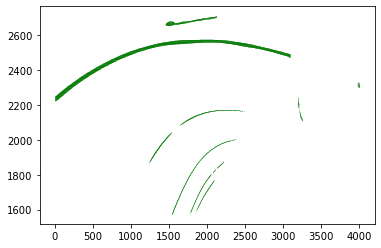

In [523]:
plt.plot(stripes_Vexagerated[:,1], stripes_Vexagerated[:,0], 'o', markersize=0.01, color='green') # create scatter plot of vertical exagerated stripes

In [430]:
stripes_single = np.copy(stripes[np.lexsort((stripes[:,0], stripes[:,1]))]) # sort stripes array by column values and then the row values
start_stop = np.where(np.diff(stripes_single[:,0], axis=0) != 1) # return index of locations where the difference between elements is not 1
start_stop = list(start_stop[0]) # convert start_stop to list
start_stop.insert(0,0) # insert a leading zero to mark start of first stripe
ind = [int(sum(start_stop[m:m+2])/2) for m in range(0, len(start_stop), 2)] # list comprehension --> finds the average of each index pair, converts to integer
stripes_single = np.copy(stripes_single[ind,:]) # slice single value for each stripe and move into stripes single

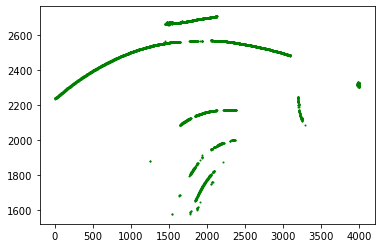

In [497]:
plt.plot(stripes_single[:,1], stripes_single[:,0], 'o', markersize=0., color='green') # create scatter plot of vertical exagerated stripes

In [451]:
from sklearn.cluster import DBSCAN # import DB Scan
distance = 100 # set inital eps (distance to jump in clustering) to 25
repeated_cluster = True # set to true to enter while loop
while repeated_cluster:
    print(distance)
    stripe_clusters = DBSCAN(eps=distance, min_samples=10).fit(stripes_Vexagerated) # fit clusters using DB SCAN



    assesment_array = np.empty([h,w]) # make empty array to build an array to asses if each vertical has all unique values
    assesment_array[:] = np.nan
    for i in range(len(stripes_single[:,0])): # iterate over all stripe coridnates
        n = stripes_single[i,0] # assign n the row number of the stripe
        n = int(n/vert_ex)
        m = stripes_single[i,1] # assign m the column number of the stripe
        x = np.where(stripes[:,0] == n)
        y = np.where(stripes[:,1] == m)
        lab_ind = np.intersect1d(x,y)
        if stripe_clusters.labels_[lab_ind] != -1: # dont assing lable to outliers
            assesment_array[n,m] = stripe_clusters.labels_[lab_ind] # assign the label

    repeated_cluster = np.where(np.diff(np.sort(assesment_array, axis=0), axis=0) == 0) # check if columns have alot of the same cluster
    repeated_cluster = len(repeated_cluster[0]) > 3 # if no more than 10 repeated clusters break while loop
    distance -= 5

100
95
90
85
80
75
70
65
60
55
50
45
40
35
30
25
20
15
10
5
0


ValueError: eps must be positive.

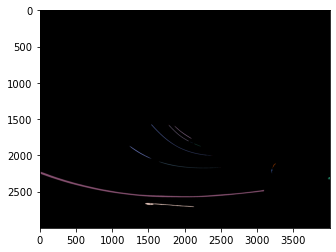

In [461]:
colours = [] # empty list to build colour for each cluster in
counter = 0
while counter < len(np.unique(stripe_clusters.labels_)): # build enough colour for each cluster
    colours.append(np.random.choice(range(256), size = 3)) # make random colour
    counter += 1
colours = np.array(colours) # convert colours to array
colours = colours[stripe_clusters.labels_] # assign colours to each test stripe

assesment_image = np.empty(orig_shape) # make empty array to build image of stripe clusters in
for i in range(len(stripes_Vexagerated[:,0])): # iterate over all stripe coridnates
    n = stripes_Vexagerated[i,0] # assign n the row number of the stripe
    n = int(n/vert_ex) # remove vertical exageration
    m = stripes_Vexagerated[i,1] # assign m the column number of the stripe
    assesment_image[n,m] = colours[i,:] # assign the label

plt.imshow(assesment_image.astype('uint8')) # plot image
plt.imsave('stripes.png', assesment_image.astype('uint8'))

In [499]:
## building seperate arrays for each stripe
stripes_single = np.copy(stripes_single[np.lexsort((stripes_single[:,0], stripes_single[:,1]))])
single_labels = assesment_array[stripes_single[:,0], stripes_single[:,1]]
sub_index = np.where(single_labels == 20)

In [500]:
from scipy.interpolate import CubicSpline
x = stripes_single[sub_index[0],1]
y = stripes_single[sub_index[0],0]

cs = CubicSpline(x,y)

ValueError: `x` must contain at least 2 elements.

In [446]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
pred = clf.fit_predict(kmeans_image)

ValueError: Found array with dim 3. Estimator expected <= 2.

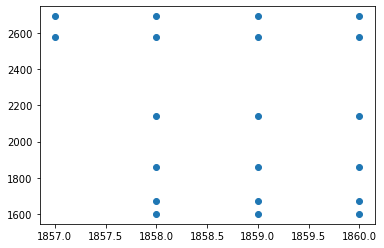

In [552]:
plt.plot(stripes_single[start_stop[3302:3320],1], stripes_single[start_stop[3300:3320],0], 'o')

In [550]:
stripes_single = np.copy(stripes[np.lexsort((stripes[:,0], stripes[:,1]))]) # sort stripes array by column values and then the row values
start_stop = np.where(np.diff(stripes_single[:,0], axis=0) != 1) # return index of locations where the difference between elements is not 1
start_stop = list(start_stop[0]) # convert start_stop to list
start_stop.insert(0,0) # insert a leading zero to mark start of first stripe
new_cols = np.where(np.diff(stripes_single[:,1], axis=0) == 1)
new_cols = list(new_cols[0])
new_cols.insert(0,0)

In [570]:
print(start_stop.index(new_cols[1500]))
print(start_stop.index(new_cols[1501]))
start_stop.index(new_cols[1500]) - start_stop.index(new_cols[1501]) != 1
print(start_stop[1846])
print(start_stop[1850])
print(stripes_single[36220:36271,:])



1846
1850
36220
36269
[[2680 1499]
 [2028 1500]
 [2029 1500]
 [2030 1500]
 [2031 1500]
 [2032 1500]
 [2547 1500]
 [2548 1500]
 [2549 1500]
 [2550 1500]
 [2551 1500]
 [2552 1500]
 [2553 1500]
 [2554 1500]
 [2555 1500]
 [2556 1500]
 [2557 1500]
 [2558 1500]
 [2559 1500]
 [2560 1500]
 [2561 1500]
 [2562 1500]
 [2563 1500]
 [2564 1500]
 [2565 1500]
 [2566 1500]
 [2656 1500]
 [2657 1500]
 [2658 1500]
 [2659 1500]
 [2660 1500]
 [2661 1500]
 [2662 1500]
 [2663 1500]
 [2664 1500]
 [2666 1500]
 [2667 1500]
 [2668 1500]
 [2669 1500]
 [2670 1500]
 [2671 1500]
 [2672 1500]
 [2673 1500]
 [2674 1500]
 [2675 1500]
 [2676 1500]
 [2677 1500]
 [2678 1500]
 [2679 1500]
 [2680 1500]
 [2028 1501]]
[[2246   63]
 [2247   63]
 [2248   63]
 [2249   63]]


In [721]:
final_ind = []
for i in range(len(new_cols)-1):
    col_starts = start_stop.index(new_cols[i])
    col_ends = start_stop.index(new_cols[i+1])
    if col_ends - col_starts == 1:
        centre_index = int((start_stop[col_ends] + start_stop[col_starts]) / 2)
        final_ind.append(centre_index)

    else:
        ss = start_stop[col_starts:col_ends+1]
        ss[0] = ss[0]+1
        todrop = []
        for j in range(1,(len(ss)-1)):
            if (stripes_single[ss[j]+1,0] - stripes_single[ss[j], 0]) < 6:
                if j != 0 or j != len(ss)-1:
                    todrop.append(j)
        val_to_drop = [ss[drop] for drop in todrop]
        [ss.remove(val) for val in val_to_drop]
        centre_index = [int(sum(ss[m:m+2])/2) for m in range(len(ss)-1)]
        [final_ind.append(index) for index in centre_index]



In [705]:
val = [ss[drop] for drop in todrop]

In [717]:
stripes_final = np.copy(stripes_single[final_ind,:])

C:\Users\VEERIN~1\AppData\Local\Temp/ipykernel_12376/2883133619.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  stripes_final = np.copy(stripes_single[final_ind,:])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [639]:
print(stripes_single[ss[3]])
print((stripes_single[ss[3]+1,0] - stripes_single[ss[3], 0]) < 6)

[2664 1500]
True


In [615]:
print(stripes_single[36249,:])

[2659 1500]


In [665]:
start_stop[18110]

IndexError: list index out of range

In [488]:
ind = [int(sum(start_stop[m:m+2])/2) for m in range(0, len(start_stop), 2)]

In [722]:
stripes_single = np.copy(stripes_single[final_ind,:])

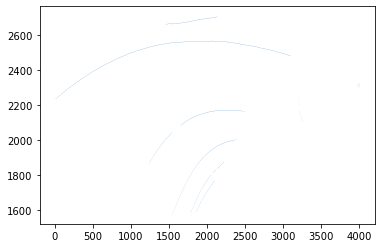

In [727]:
plt.plot(stripes_single[:,1], stripes_single[:,0], 'o', markersize = 0.005)